In [1]:
import yfinance as yf
import pandas as pd
import os

In [2]:
if os.path.exists("data.csv"):
    nifty50 = pd.read_csv("data.csv", index_col=0)
else:
    nifty50 = yf.Ticker("^NSEI")
    nifty50 = nifty50.history(period="max")
    nifty50.to_csv("data.csv")

In [3]:
nifty50.index = pd.to_datetime(nifty50.index,dayfirst=True)

In [4]:
nifty50

,Close,Open,High,Low,Vol.,Change
Date,,,,,,
2005-01-03,2115.00,2080.00,2118.60,2080.00,70.51,1.66
2005-01-04,2103.75,2116.95,2120.15,2100.55,72.72,-0.53
2005-01-05,2032.20,2103.75,2105.10,1990.15,109.22,-3.40
2005-01-06,1998.35,2031.55,2035.65,1984.25,94.32,-1.67
2005-01-07,2015.50,1998.25,2021.45,1992.55,76.29,0.86
...,...,...,...,...,...,...
2024-11-27,24274.90,24204.80,24354.55,24145.65,295.01,0.33
2024-11-28,23914.15,24274.15,24345.75,23873.35,366.75,-1.49
2024-11-29,24131.10,23927.15,24188.45,23927.15,282.10,0.91


In [5]:

#df = pd.read_csv('data.csv')
#df['Change'] = df['Change'].str.replace('%', '', regex=False)
#df['Open'] = df['Open'].str.replace(',', '', regex=False)
#df['High'] = df['High'].str.replace(',', '', regex=False)
#df['Low'] = df['Low'].str.replace(',', '', regex=False)
#df.to_csv('data.csv', index=False)

#import pandas as pd

# Step 1: Read the CSV file
#df = pd.read_csv('data.csv')

# Step 2: Print column names to see if 'Change' exists
#print("Columns in the dataset:", df.columns)

# Step 3: Clean up column names by stripping extra spaces
#df.columns = df.columns.str.strip()

# Step 4: Check if 'Change' column exists now and perform the operation
#if 'Change' in df.columns:
   # df['Change'] = df['Change'].str.replace('%', '', regex=False)
    # Optionally, convert the 'Change' column to numeric values
  #  df['Change'] = pd.to_numeric(df['Change'], errors='coerce')  # To handle non-numeric values
#else:
 #   print("Column 'Change' not found.")

# Step 5: Save the updated DataFrame back to a CSV file
#df.to_csv('updated_data.csv', index=False)

# Optionally, print the first few rows to verify
#print(df.head())

#nifty50.index

In [6]:
 
#file_path = 'data.csv' 
#df = pd.read_csv(file_path)
#df_reversed_rows = df.iloc[::-1]
#reversed_rows_file_path = 'data.csv'  # New file where the data with reversed rows will be saved
#df_reversed_rows.to_csv(reversed_rows_file_path, index=False)
#print(df_reversed_rows.head())
#file_path = 'data.csv'  # Replace with your actual file path
#df = pd.read_csv(file_path)

#def clean_volume_data(value):
#    if isinstance(value, str):  # Check if the value is a string
#        value = value.replace('M', '')  # Remove 'M' (millions)
#        value = value.replace('K', '')  # Remove 'K' (thousands)
#        value = value.replace(',', '')  # Remove commas, if any
#        try:
#            return float(value) 
 #       except ValueError:
 #           return None  
  #  return value

#df['Vol.'] = df['Vol.'].apply(clean_volume_data)

#cleaned_file_path = 'data.csv'  
#df.to_csv(cleaned_file_path, index=False)
#print(df.head())


<Axes: xlabel='Date'>

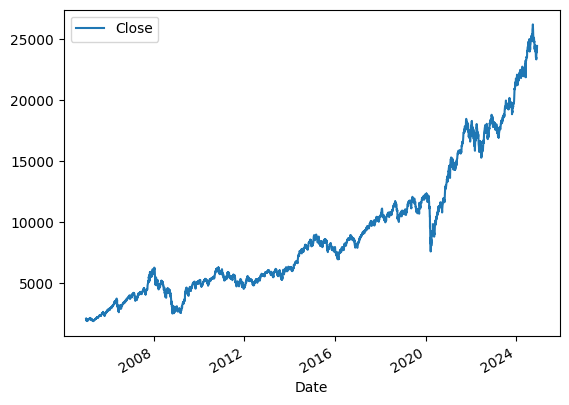

In [7]:

nifty50.plot.line(y='Close',use_index=True)

In [8]:
nifty50["Tomorrow"] = nifty50["Close"].shift(-1)
nifty50

,Close,Open,High,Low,Vol.,Change,Tomorrow
Date,,,,,,,
2005-01-03,2115.00,2080.00,2118.60,2080.00,70.51,1.66,2103.75
2005-01-04,2103.75,2116.95,2120.15,2100.55,72.72,-0.53,2032.20
2005-01-05,2032.20,2103.75,2105.10,1990.15,109.22,-3.40,1998.35
2005-01-06,1998.35,2031.55,2035.65,1984.25,94.32,-1.67,2015.50
2005-01-07,2015.50,1998.25,2021.45,1992.55,76.29,0.86,1982.00
...,...,...,...,...,...,...,...
2024-11-27,24274.90,24204.80,24354.55,24145.65,295.01,0.33,23914.15
2024-11-28,23914.15,24274.15,24345.75,23873.35,366.75,-1.49,24131.10
2024-11-29,24131.10,23927.15,24188.45,23927.15,282.10,0.91,24276.05


In [9]:
nifty50["Target"] = (nifty50["Tomorrow"] > nifty50["Close"]).astype(int)
nifty50

,Close,Open,High,Low,Vol.,Change,Tomorrow,Target
Date,,,,,,,,
2005-01-03,2115.00,2080.00,2118.60,2080.00,70.51,1.66,2103.75,0
2005-01-04,2103.75,2116.95,2120.15,2100.55,72.72,-0.53,2032.20,0
2005-01-05,2032.20,2103.75,2105.10,1990.15,109.22,-3.40,1998.35,0
2005-01-06,1998.35,2031.55,2035.65,1984.25,94.32,-1.67,2015.50,1
2005-01-07,2015.50,1998.25,2021.45,1992.55,76.29,0.86,1982.00,0
...,...,...,...,...,...,...,...,...
2024-11-27,24274.90,24204.80,24354.55,24145.65,295.01,0.33,23914.15,0
2024-11-28,23914.15,24274.15,24345.75,23873.35,366.75,-1.49,24131.10,1
2024-11-29,24131.10,23927.15,24188.45,23927.15,282.10,0.91,24276.05,1


In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = nifty50.iloc[:-100]
test = nifty50.iloc[-100:]

predictors = ["Close", "Vol.", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [11]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

np.float64(0.52)

<Axes: xlabel='Date'>

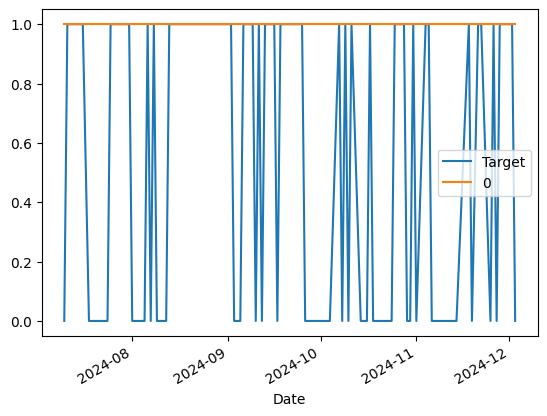

In [12]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [13]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [14]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [15]:
predictions = backtest(nifty50, model, predictors)

In [16]:
predictions["Predictions"].value_counts()

Predictions
1    1299
0    1141
Name: count, dtype: int64

In [17]:
precision_score(predictions["Target"], predictions["Predictions"])

np.float64(0.5327174749807544)

In [18]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.541393
0    0.458607
Name: count, dtype: float64

In [19]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = nifty50.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    nifty50[ratio_column] =nifty50["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    nifty50[trend_column] = nifty50.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

In [20]:
nifty50 = nifty50.dropna(subset=nifty50.columns[nifty50.columns != "Tomorrow"])

In [21]:
nifty50

,Close,Open,High,Low,Vol.,Change,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,
2009-01-07,2920.40,3112.80,3147.20,2888.20,686.89,-6.18,2873.00,0,0.968110,0.0,0.958460,3.0,0.993901,28.0,0.678209,120.0,0.805058,556.0
2009-01-09,2873.00,2919.95,2929.85,2810.25,591.98,-1.62,2773.10,0,0.991818,0.0,0.952940,2.0,0.981336,28.0,0.669256,119.0,0.791824,556.0
2009-01-12,2773.10,2868.85,2869.20,2748.55,382.11,-3.48,2744.95,0,0.982306,0.0,0.936811,1.0,0.949954,28.0,0.648041,119.0,0.764134,556.0
2009-01-13,2744.95,2775.00,2802.60,2720.80,252.70,-1.02,2835.30,1,0.994899,0.0,0.951505,0.0,0.944331,27.0,0.643586,118.0,0.756222,556.0
2009-01-14,2835.30,2748.40,2853.25,2748.40,217.30,3.29,2736.70,0,1.016191,1.0,1.002103,1.0,0.979251,27.0,0.666924,118.0,0.780937,556.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-27,24274.90,24204.80,24354.55,24145.65,295.01,0.33,23914.15,0,1.001659,1.0,1.011889,3.0,0.979188,26.0,1.047729,145.0,1.303852,556.0
2024-11-28,23914.15,24274.15,24345.75,23873.35,366.75,-1.49,24131.10,1,0.992514,1.0,0.992184,3.0,0.965522,25.0,1.031425,145.0,1.283708,555.0
2024-11-29,24131.10,23927.15,24188.45,23927.15,282.10,0.91,24276.05,1,1.004516,1.0,0.999329,3.0,0.975035,25.0,1.040021,145.0,1.294571,555.0


In [22]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [23]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [24]:
predictions = backtest(nifty50, model, new_predictors)

In [25]:
predictions["Predictions"].value_counts()

Predictions
0.0    1228
1.0     191
Name: count, dtype: int64

In [26]:
ps=precision_score(predictions["Target"], predictions["Predictions"])

In [27]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.552502
0    0.447498
Name: count, dtype: float64

In [28]:
predictions

,Target,Predictions
Date,,
2019-02-11,0,0.0
2019-02-12,0,0.0
2019-02-13,0,0.0
2019-02-14,0,0.0
2019-02-15,0,0.0
...,...,...
2024-11-27,0,0.0
2024-11-28,1,0.0
2024-11-29,1,0.0


In [29]:
ps

np.float64(0.6073298429319371)